# Treinamento do Modelo LeNet-5 no Dataset MNIST

Este notebook demonstra a implementação e treinamento de uma rede neural convolucional baseada na arquitetura LeNet-5 usando o dataset MNIST.

## Estrutura do Notebook

1. Importações e Configurações
2. Definição da Arquitetura LeNet-5
3. Carregamento e Pré-processamento do Dataset
4. Compilação e Treinamento do Modelo
5. Avaliação e Visualização dos Resultados
6. Considerações Finais


## 1. Importações e Configurações

In [9]:
# Importar pacotes necessários
import tensorflow as tf
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import numpy as np

In [10]:
# Configuração para usar GPU no Google Colab
print(f"TensorFlow Version: {tf.__version__}")
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    print('GPU device not found')
else:
    print('Found GPU at: {}'.format(device_name))

TensorFlow Version: 2.16.1
GPU device not found


## 2. Definição da Arquitetura LeNet-5

A arquitetura LeNet-5 é composta pelas seguintes camadas:

1. Camada Convolucional 1: 6 filtros (5x5), ReLU, MaxPooling (2x2)
2. Camada Convolucional 2: 16 filtros (5x5), ReLU, MaxPooling (2x2)
3. Camada Flatten
4. Camada Densa 1: 120 neurônios, ReLU
5. Camada Densa 2: 84 neurônios, ReLU
6. Camada de Saída: 10 neurônios, Softmax

In [11]:
# Definição da classe LeNet-5
class LeNet5:
    @staticmethod
    def build(width, height, depth, classes):
        model = Sequential()
        inputShape = (height, width, depth)

        # Primeira camada CONV => RELU => POOL
        model.add(Conv2D(6, (5, 5), padding="same", input_shape=inputShape))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

        # Segunda camada CONV => RELU => POOL
        model.add(Conv2D(16, (5, 5)))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

        # Camada Flatten => FC => RELU
        model.add(Flatten())
        model.add(Dense(120))
        model.add(Activation("relu"))

        # Camada FC => RELU
        model.add(Dense(84))
        model.add(Activation("relu"))

        # Camada FC => SOFTMAX
        model.add(Dense(classes))
        model.add(Activation("softmax"))

        return model

# Instanciar o modelo
model = LeNet5.build(width=28, height=28, depth=1, classes=10)
# Exibir um resumo do modelo
model.summary()

/home/caze/.pyenv/versions/3.12.3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 28, 28, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 10, 10, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 120)            │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 84)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,706 (241.04 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)

## 3. Carregamento e pré-processamento do dataset MNIST

O dataset MNIST contém imagens de dígitos manuscritos (0-9) e é comumente usado para treinar e testar algoritmos de aprendizado de máquina.

In [12]:
# Carregar e preprocessar o dataset MNIST
mnist = fetch_openml('mnist_784', version=1)
data = mnist.data.to_numpy().reshape(-1, 28, 28, 1).astype('float32') / 255.0
labels = to_categorical(mnist.target.astype('int'))

# Dividir o dataset em treino e teste
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.25, random_state=42)

## 4. Compilação e Treinamento do Modelo



Compilamos o modelo usando o otimizador SGD e a função de perda `categorical_crossentropy`. Treinaremos o modelo por 20 épocas.


In [13]:
# Compilar o modelo
model.compile(optimizer=SGD(0.01), loss="categorical_crossentropy", metrics=["accuracy"])

# Treinar o modelo
print("[INFO] treinando a CNN...")
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=20, batch_size=128, verbose=2)


[INFO] treinando a CNN...
Epoch 1/20
411/411 - 7s - 17ms/step - accuracy: 0.6401 - loss: 1.2283 - val_accuracy: 0.8171 - val_loss: 0.6006
Epoch 2/20
411/411 - 6s - 15ms/step - accuracy: 0.9081 - loss: 0.3092 - val_accuracy: 0.7643 - val_loss: 0.8807
Epoch 3/20
411/411 - 6s - 15ms/step - accuracy: 0.9339 - loss: 0.2196 - val_accuracy: 0.9201 - val_loss: 0.2603
Epoch 4/20
411/411 - 6s - 15ms/step - accuracy: 0.9482 - loss: 0.1722 - val_accuracy: 0.9542 - val_loss: 0.1532
Epoch 5/20
411/411 - 6s - 15ms/step - accuracy: 0.9562 - loss: 0.1443 - val_accuracy: 0.9586 - val_loss: 0.1385
Epoch 6/20
411/411 - 6s - 15ms/step - accuracy: 0.9619 - loss: 0.1256 - val_accuracy: 0.9527 - val_loss: 0.1569
Epoch 7/20
411/411 - 6s - 15ms/step - accuracy: 0.9662 - loss: 0.1112 - val_accuracy: 0.9653 - val_loss: 0.1164
Epoch 8/20
411/411 - 6s - 15ms/step - accuracy: 0.9700 - loss: 0.0994 - val_accuracy: 0.9672 - val_loss: 0.1108
Epoch 9/20
411/411 - 6s - 15ms/step - accuracy: 0.9722 - loss: 0.0905 - val_ac

## 5. Avaliação e Visualização dos Resultados



Vamos avaliar o desempenho do modelo e visualizar a perda e acurácia durante o treinamento.


[INFO] avaliando a CNN...
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1714
           1       0.99      0.99      0.99      1977
           2       0.97      0.98      0.98      1761
           3       0.97      0.98      0.97      1806
           4       0.99      0.96      0.98      1587
           5       0.99      0.97      0.98      1607
           6       0.98      1.00      0.99      1761
           7       0.99      0.97      0.98      1878
           8       0.97      0.98      0.98      1657
           9       0.96      0.97      0.96      1752

    accuracy                           0.98     17500
   macro avg       0.98      0.98      0.98     17500
weighted avg       0.98      0.98      0.98     17500



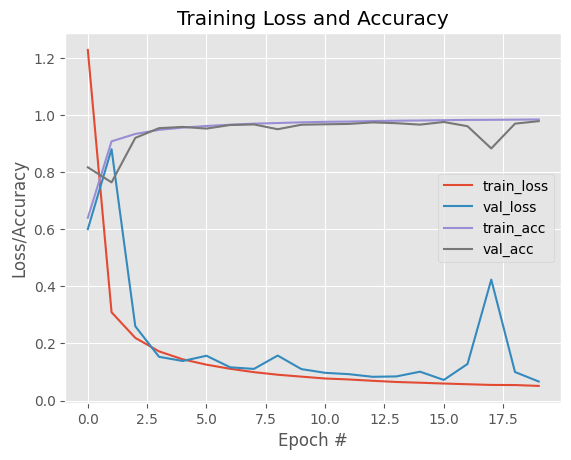

In [14]:
# Avaliar o modelo
print("[INFO] avaliando a CNN...")
predictions = model.predict(testX, batch_size=128)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=[str(x) for x in range(10)]))

# Plotar os resultados do treinamento
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 20), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 20), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 20), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 20), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()


## 6. Considerações Finais

### Resultados Obtidos
- A precisão do modelo nos dados de treino aumentou consistentemente a cada época, indicando que o modelo estava aprendendo com os dados fornecidos.
- A precisão nos dados de validação também aumentou, mas apresentou algumas flutuações, o que pode indicar que o modelo começou a se ajustar muito aos dados de treino (overfitting).

### Dificuldades de Implementação
- **Compatibilidade de Bibliotecas**: Foi necessário ajustar as importações devido às mudanças nas versões das bibliotecas TensorFlow/Keras.
- **Treinamento em CPU vs GPU**: O tempo de treinamento no Google Colab foi significativamente menor ao usar GPU em comparação com CPU.
- **Preprocessamento de Dados**: O dataset MNIST precisou ser normalizado e reshaped para ser compatível com a entrada do modelo LeNet-5.

### Conclusão
Neste notebook, demonstramos a implementação e treinamento de uma rede neural convolucional baseada na arquitetura LeNet-5 utilizando o dataset MNIST. A arquitetura LeNet-5 mostrou-se eficaz, alcançando boa precisão tanto nos dados de treino quanto nos dados de validação.
